# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


Выполнил: **Швец Антон Юрьевич**

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import markdown
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


random.seed(42)
np.random.seed(42)
random_state = 42

In [187]:
df = pd.read_csv('df_train.csv')
df.head(3)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   

                     torque  seats  
0            190Nm@ 2000rpm   5.00  
1       250Nm@ 1500-2500rpm   5.00  
2  22.4 kgm at 1750-2750rpm   5.00

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?





> для воспроизводимсоти резов. я кста смотерл подкаст когда-то давно, и там говорилось что число 42 это отссылка на книжку "Автостопо по галактике"



# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [189]:
import pandas as pd

In [190]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


---

In [191]:
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)
print('df_train.csv и df_test.csv выгружены как отдельыне файлы')

df_train.csv и df_test.csv выгружены как отдельыне файлы


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [x] Отобразите 30 случайных строк тренировочного датасета.
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [x] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [x] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [x] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

**→ Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

Выводы строк можно использовать для анализа значений из столбцов; необходимсоти их преобразования, изменения типа данных, форматирования (приведения к одному общему виду), дробления столбцов на несколько

Вывод строк из разных частей датасета даёт более полное представление чем условное data.head(), т.к. наличие строк не только из начала и конца но и из случайных позиций более репрезентативно

Так же можно принять решение о примееннии енкодерв, преобразовании категор. признаков в числовые

Индексы ещё видно, помогает не запутаться при дальшейм EDA, обработке признаков

In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [193]:
# Ваш код здесь
df_train.sample(n=30)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [194]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm   5.00  
1       250Nm@ 1500-2500rpm   5.00  
2  22.4 kgm at 1750-2750rpm   5.00  
3     11.5@ 4,500(kgm@ rpm)   5.00  
4         113.75nm@ 4000rpm   5.00

In [195]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm   5.00  
996          114.7Nm@ 4000rpm   5.00  
997  22.4 kgm at 1750-2750rpm   5.00  
998          111.8Nm@ 4000rpm   5.00  
999            200Nm@ 1750rpm   5.00

In [196]:
total_df = pd.concat([df_train, df_test])
tmp = pd.DataFrame(total_df.isna().sum())
tmp = tmp.set_axis(['количесвто пропусков'], axis=1)
total_df.reset_index(drop=True, inplace=True)
tmp[tmp['количесвто пропусков'] != 0]

количесвто пропусков
mileage                     221
engine                      221
max_power                   215
torque                      222
seats                       221

In [197]:
# я искал как ещё можно проверить наличие пропусков на случай если вдруг пропуск попал в датасет не как NaN, а как какое-нибдуь отличное строковое значение, или вообще ноль. и нашёл это
# в этой ячейке уже не мой код, а копипаста!!!!! Просто результат оч интересный, надо взять на вооружение

obj_cols = total_df.select_dtypes(include='object')

for col in obj_cols.columns:
    print('\n', col)
    print(obj_cols[col].value_counts(dropna=False))


 name
name
Maruti Swift Dzire VDI                 128
Maruti Alto 800 LXI                     81
Maruti Alto LXi                         69
Maruti Swift VDI                        61
BMW X4 M Sport X xDrive20d              60
                                      ... 
Tata Indica Vista Quadrajet VX Tech      1
Hyundai Sonata CRDi M/T                  1
Nissan Micra Active XV S                 1
Mahindra Scorpio S5 BSIV                 1
Datsun GO Plus T Option BSIV             1
Name: count, Length: 2045, dtype: int64

 fuel
fuel
Diesel    4327
Petrol    3577
CNG         57
LPG         38
Name: count, dtype: int64

 seller_type
seller_type
Individual          6663
Dealer              1102
Trustmark Dealer     234
Name: count, dtype: int64

 transmission
transmission
Manual       6972
Automatic    1027
Name: count, dtype: int64

 owner
owner
First Owner             5210
Second Owner            2069
Third Owner              544
Fourth & Above Owner     171
Test Drive Car             5
N

##### **ПОЛНЫЕ ДУБЛИКАТЫ**

In [198]:
dup = total_df[total_df.duplicated()]
if not dup.empty:
  display(dup)
else:
  print('Дубликатов нет')

name  year  selling_price  \
254                      Hyundai Grand i10 Sportz  2017         450000   
258                              Maruti Swift VXI  2012         330000   
324      Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                                 Lexus ES 300h  2019        5150000   
326                Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                           ...   ...            ...   
7965                                 Honda City S  2011         450000   
7970                  Maruti Ertiga SHVS ZDI Plus  2017         750000   
7973  Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  2005         310000   
7983                              Maruti Ritz VDi  2012         300000   
7986                           Tata Indigo CS eVX  2013         227999   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
7965     110000  Petrol  Individual       Manual   Third Owner   16.8 kmpl   
7970      50000  Diesel  Individual       Manual   First Owner  24.52 kmpl   
7973     200000  Diesel  Individual       Manual  Second Owner   12.8 kmpl   
7983      70000  Diesel  Individual       Manual   First Owner   23.2 kmpl   
7986      60000  Diesel  Individual       Manual  Second Owner   25.0 kmpl   

       engine   max_power                     torque  seats  
254   1197 CC      82 bhp             114Nm@ 4000rpm   5.00  
258   1197 CC    85.8 bhp             114Nm@ 4000rpm   5.00  
324   1999 CC     177 bhp        430Nm@ 1750-2500rpm   5.00  
325   2487 CC  214.56 bhp        202Nm@ 3600-5200rpm   5.00  
326   1999 CC     177 bhp        430Nm@ 1750-2500rpm   5.00  
...       ...         ...                        ...    ...  
7965  1497 CC   116.4 bhp             146Nm@ 4800rpm   5.00  
7970  1248 CC    88.5 bhp             200Nm@ 1750rpm   7.00  
7973  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)   8.00  
7983  1248 CC   73.94 bhp             190Nm@ 2000rpm   5.00  
7986  1396 CC   69.01 bhp        140Nm@ 1800-3000rpm   5.00  

[1170 rows x 13 columns]

In [199]:
pip install ydata-profiling

In [200]:
from ydata_profiling import ProfileReport
profile = ProfileReport(total_df, title="Дашборд")

In [201]:
profile.to_file("my_dashbordik.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00,  7.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [202]:
profile.to_notebook_iframe()

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Перед заполением пропусков необходимо отформатировать столбцы **mileage,	engine,	max_power, torque,	seats**


In [203]:
# mileage, engine, max_power. Уубрал ед. измерения, привёл к floa/int, NaN не трогаю
# total_df['mileage'] = total_df['mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x) # total_df  у меня тут как подопытный мыш
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)

# total_df['engine'] = total_df['engine'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)
df_train['engine'] = df_train['engine'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)
df_test['engine'] = df_test['engine'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)
# total_df['max_power'] = total_df['max_power'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x) # тут возникла ошибка (см. скрин, но я её исправил ниже)

тут оказывается интересный экз есть, его я поправилю ниже





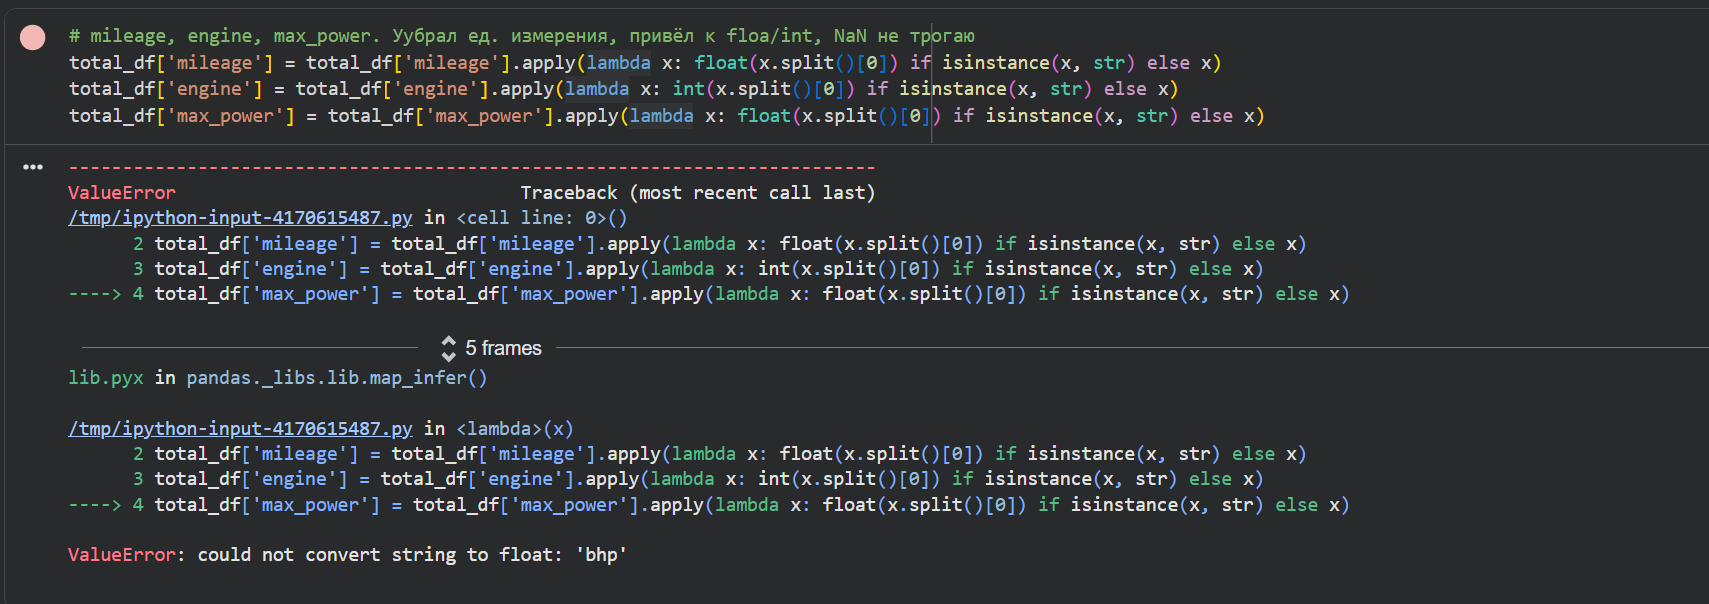

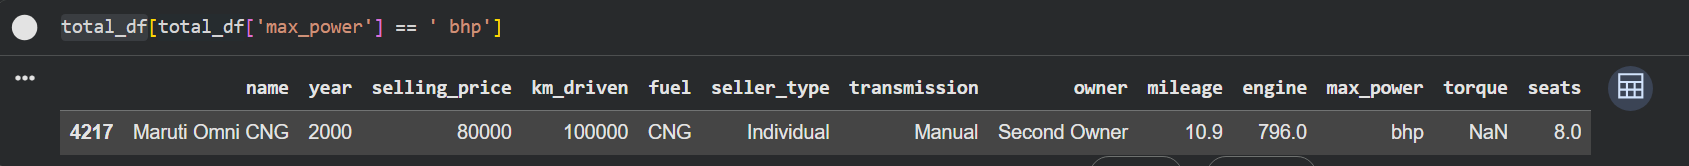

In [204]:
df_train[df_train['max_power'] == 'bhp']

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]
Index: []

In [205]:
# total_df.loc[4217, ['max_power']] = np.nan
df_train.loc[4217, ['max_power']] = np.nan

In [206]:
# total_df['max_power'] = total_df['max_power'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)

In [207]:
total_df['torque'].sample(n=50) # не столбец а жесть какая-то

# надо парсить, что я тут вижу по шаблонам:
# 200Nm@ 2000rpm
# 200Nm@ 1750-3000rpm
# 20.4@ 1400-3400(kgm@ rpm)
# 12.5kgm@ 3500rpm
# 24 KGM at 1900-2750 RPM
# NaN
# если увижу чтот ещё то доработаю на этапе обрушения кода из-за непредусмотренного шаблона))))))

5784        224nm@ 1500-2750rpm
1056             148Nm@ 3500rpm
5987           12.5kgm@ 3500rpm
3643                      400Nm
2049        215Nm@ 1750-3000rpm
4861        205Nm@ 1750-3250rpm
2479        250Nm@ 1500-2500rpm
1970             145Nm@ 4100rpm
7967              62Nm@ 3000rpm
3445        290Nm@ 1800-2800rpm
2323              69Nm@ 3500rpm
3807             100Nm@ 2700rpm
3020             190Nm@ 2000rpm
3600             190Nm@ 2000rpm
1139             190Nm@ 2000rpm
4657             160Nm@ 2000rpm
7290             114Nm@ 4000rpm
4485        400nm@ 1750-3000rpm
3016              72Nm@ 4386rpm
1012        195Nm@ 1400-2200rpm
6948      277.5Nm@ 1700-2200rpm
251         400Nm@ 1400-2800rpm
1940             114Nm@ 4000rpm
3840        205Nm@ 1750-3250rpm
3449             134Nm@ 4000rpm
5909             104Nm@ 4000rpm
950              110Nm@ 4800rpm
139         300Nm@ 1200-4000rpm
6267        250nm@ 1500-3000rpm
5294              90Nm@ 3500rpm
4606    24 KGM at 1900-2750 RPM
2088              91Nm@ 4250rpm
2054             114Nm@ 4000rpm
5810              91Nm@ 4250rpm
1134              69Nm@ 3500rpm
7222             190Nm@ 2000rpm
6151          190 Nm at 2000rpm
7275             145Nm@ 4600rpm
6511        250Nm@ 1500-2500rpm
3105          114.73Nm@ 4000rpm
7914        202Nm@ 3600-5200rpm
2753                        NaN
1630             104Nm@ 4400rpm
6188             200Nm@ 1750rpm
1534        280Nm@ 1800-2800rpm
4980        240Nm@ 1600-2800rpm
764               90Nm@ 3500rpm
5882             102Nm@ 4000rpm
4304             113Nm@ 4200rpm
7525              59Nm@ 2500rpm
Name: torque, dtype: object

In [208]:
def magic_parsing(cell):
  if pd.isna(cell):
    return pd.Series([np.nan, np.nan])

  cell_val = str(cell).lower().replace(' ', '').replace(',', '')

  moment_search = re.search(r'([\d\.]+)', cell_val)

  if not moment_search:
    return pd.Series([np.nan, np.nan])

  torque = float(moment_search.group(1))

  if 'kgm' in cell_val:
    torque *= 9.81

  rpm = np.nan
  rpm_search = re.search(r'@(.*)', cell_val)

  if not rpm_search:
    rpm_search = re.search(r'at(.*)', cell_val)
  if rpm_search:
    rpm_part = rpm_search.group(1)
    nums = re.findall(r'\d+', rpm_part)

    if len(nums) == 1:
        rpm = float(nums[0])
    elif len(nums) >= 2:
        rpm = (float(nums[0]) + float(nums[1]))*0.5

  return pd.Series([torque, rpm])


In [209]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  engine  \
0     Individual       Manual           First Owner    23.40 1248.00   
1     Individual       Manual          Second Owner    21.14 1498.00   
2     Individual       Manual           First Owner    23.00 1396.00   
3     Individual       Manual           First Owner    16.10 1298.00   
4     Individual       Manual           First Owner    20.14 1197.00   
...          ...          ...                   ...      ...     ...   
6994  Individual       Manual           First Owner    18.50 1197.00   
6995  Individual       Manual  Fourth & Above Owner    16.80 1493.00   
6996  Individual       Manual           First Owner    19.30 1248.00   
6997  Individual       Manual           First Owner    23.57 1396.00   
6998  Individual       Manual           First Owner    23.57 1396.00   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm   5.00  
1        103.52        250Nm@ 1500-2500rpm   5.00  
2         90.00   22.4 kgm at 1750-2750rpm   5.00  
3         88.20      11.5@ 4,500(kgm@ rpm)   5.00  
4         81.86          113.75nm@ 4000rpm   5.00  
...         ...                        ...    ...  
6994      82.85           113.7Nm@ 4000rpm   5.00  
6995     110.00  24@ 1,900-2,750(kgm@ rpm)   5.00  
6996      73.90             190Nm@ 2000rpm   5.00  
6997      70.00        140Nm@ 1800-3000rpm   5.00  
6998      70.00        140Nm@ 1800-3000rpm   5.00  

[6999 rows x 13 columns]

In [210]:
# total_df[['torque_Nm', 'rpm']] = total_df['torque'].apply(magic_parsing)
df_train[['torque_Nm', 'rpm']] = df_train['torque'].apply(magic_parsing)
df_test[['torque_Nm', 'rpm']] = df_test['torque'].apply(magic_parsing)

# total_df = total_df.drop('torque', axis=1)
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  engine  \
0     Individual       Manual           First Owner    23.40 1248.00   
1     Individual       Manual          Second Owner    21.14 1498.00   
2     Individual       Manual           First Owner    23.00 1396.00   
3     Individual       Manual           First Owner    16.10 1298.00   
4     Individual       Manual           First Owner    20.14 1197.00   
...          ...          ...                   ...      ...     ...   
6994  Individual       Manual           First Owner    18.50 1197.00   
6995  Individual       Manual  Fourth & Above Owner    16.80 1493.00   
6996  Individual       Manual           First Owner    19.30 1248.00   
6997  Individual       Manual           First Owner    23.57 1396.00   
6998  Individual       Manual           First Owner    23.57 1396.00   

      max_power  seats  torque_Nm     rpm  
0         74.00   5.00     190.00 2000.00  
1        103.52   5.00     250.00 2000.00  
2         90.00   5.00     219.74 2250.00  
3         88.20   5.00     112.82 4500.00  
4         81.86   5.00     113.75 4000.00  
...         ...    ...        ...     ...  
6994      82.85   5.00     113.70 4000.00  
6995     110.00   5.00     235.44 2325.00  
6996      73.90   5.00     190.00 2000.00  
6997      70.00   5.00     140.00 2400.00  
6998      70.00   5.00     140.00 2400.00  

[6999 rows x 14 columns]

In [211]:
total_df['seats'].fillna(total_df['seats'].median(), inplace=True)
total_df['seats']

/tmp/ipython-input-51426219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_df['seats'].fillna(total_df['seats'].median(), inplace=True)


0      5.00
1      5.00
2      5.00
3      5.00
4      5.00
       ... 
7994   5.00
7995   5.00
7996   5.00
7997   5.00
7998   5.00
Name: seats, Length: 7999, dtype: float64

In [212]:
for i in ['mileage', 'engine', 'max_power', 'torque_Nm', 'rpm', 'seats']:
  median_value = df_train[i].median()
  df_train[i].fillna(median_value, inplace=True)
  df_test[i].fillna(median_value, inplace=True)


/tmp/ipython-input-552863029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(median_value, inplace=True)
/tmp/ipython-input-552863029.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [213]:
total_df1 = pd.concat([df_train, df_test])
tmp = pd.DataFrame(total_df1.isna().sum())
tmp = tmp.set_axis(['количесвто пропусков'], axis=1)
total_df.reset_index(drop=True, inplace=True)
tmp[tmp['количесвто пропусков'] != 0]

Empty DataFrame
Columns: [количесвто пропусков]
Index: []

---

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной (**selling_price**). В этом шаге займемся такими дублями!

**Ваши действия:**

- [x] Посмотрите, есть ли в **трейне** объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


объекты с одинаковым признаковым описанием (только повторившееся объекты)


In [214]:
df_train_no_target = df_train.drop('selling_price', axis=1)
dup_no_target = df_train_no_target[df_train_no_target.duplicated()]
if not dup_no_target.empty:
  display(dup_no_target)
else:
  print('Дубликатов нет')

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner  mileage  engine  max_power  \
254   Individual       Manual   First Owner    18.90 1197.00      82.00   
258   Individual       Manual  Second Owner    18.60 1197.00      85.80   
268   Individual       Manual  Second Owner    19.10 1197.00      85.80   
324       Dealer    Automatic   First Owner    13.60 1999.00     177.00   
325       Dealer    Automatic   First Owner    22.37 2487.00     214.56   
...          ...          ...           ...      ...     ...        ...   
6947  Individual       Manual  Second Owner    18.00  995.00      62.00   
6984  Individual       Manual   First Owner    24.40 1498.00      98.63   
6989  Individual       Manual   First Owner    26.59 1248.00      74.00   
6997  Individual       Manual   First Owner    23.57 1396.00      70.00   
6998  Individual       Manual   First Owner    23.57 1396.00      70.00   

      seats  torque_Nm     rpm  
254    5.00     114.00 4000.00  
258    5.00     114.00 4000.00  
268    5.00     114.00 4000.00  
324    5.00     430.00 2125.00  
325    5.00     202.00 4400.00  
...     ...        ...     ...  
6947   5.00      90.30 4200.00  
6984   5.00     215.00 2375.00  
6989   5.00     190.00 2000.00  
6997   5.00     140.00 2400.00  
6998   5.00     140.00 2400.00  

[1159 rows x 13 columns]

In [215]:
print(f'Число объектов с повторившимся признаковым описанием {dup_no_target.shape[0]}')

Число объектов с повторившимся признаковым описанием 1159


In [216]:
df_train = df_train.drop_duplicates(subset=df_train_no_target.columns, keep='first')

In [217]:
df_train.shape

(5840, 14)

In [218]:
df_train.reset_index(drop=True, inplace=True)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать



In [219]:
# задание выполнено выше

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [220]:
# df_test['engine',  'seats'] = pd.to_numeric(df_test['engine',  'seats'], downcast='integer', errors='coerce')
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
# df_test['seats'] = df_test['seats'].apply(lambda x: int(x))

/tmp/ipython-input-2930530780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)


In [221]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
 12  torque_Nm      1000 non-null   float64
 13  rpm            1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


In [222]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque_Nm      5840 non-null   float64
 13  rpm            5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [223]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [224]:
print('df_train')
display(df_train.describe(exclude='object'))
print('df_test')
display(df_test.describe(exclude='object'))

df_train


year  selling_price  km_driven  mileage  engine  max_power   seats  \
count 5840.00        5840.00    5840.00  5840.00 5840.00    5840.00 5840.00   
mean  2013.43      522960.09   73952.24    19.43 1429.45      87.91    5.43   
std      4.10      535432.00   60071.14     3.99  485.66      31.64    0.98   
min   1983.00       29999.00       1.00     0.00  624.00       0.00    2.00   
25%   2011.00      250000.00   39000.00    16.95 1197.00      68.00    5.00   
50%   2014.00      405000.00   70000.00    19.30 1248.00      81.86    5.00   
75%   2017.00      640000.00  100000.00    22.30 1498.00      99.00    5.00   
max   2020.00    10000000.00 2360457.00    42.00 3604.00     400.00   14.00   

       torque_Nm      rpm  
count    5840.00  5840.00  
mean      176.26  2847.03  
std       116.75   972.67  
min        47.09  1300.00  
25%       111.80  2000.00  
50%       170.00  2400.00  
75%       200.12  3750.00  
max      3727.80 21800.00

df_test


year  selling_price  km_driven  mileage  engine  max_power   seats  \
count 1000.00        1000.00    1000.00  1000.00 1000.00    1000.00 1000.00   
mean  2013.68      617901.04   71393.34    19.34 1454.88      90.84    5.40   
std      4.01      758553.86   48486.22     3.95  522.00      34.89    0.91   
min   1995.00       31000.00    1303.00     0.00  624.00      34.20    4.00   
25%   2011.00      250000.00   37000.00    16.55 1197.00      69.00    5.00   
50%   2014.00      434999.00   61500.00    19.30 1248.00      82.42    5.00   
75%   2017.00      670000.00  100000.00    22.30 1582.00     102.00    5.00   
max   2020.00     6000000.00  375000.00    32.26 3604.00     280.00    9.00   

       torque_Nm     rpm  
count    1000.00 1000.00  
mean      177.81 2890.84  
std       103.72  954.93  
min        48.00 1470.00  
25%       111.70 2125.00  
50%       170.00 2400.00  
75%       205.00 4000.00  
max      1422.45 5000.00

In [225]:
print('df_train')
display(df_train.describe(include='object'))
print('df_test')
display(df_test.describe(include='object'))

df_train


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

df_test


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [226]:
assert df_train.shape == (5840, 14)

**Выводы:**
- из-за преобразования торкуе внёс +1 столбец

  *по числовым признакам*:
  - в трейне есть авто с max_power равным 0. Либо ошибка при EDA, либо аномалия
  - почему-то count для max_power у меня 5839.00 (как будто бы кто-то потерялся)
  - в целом распределния между трейном и тестом +- одинаковы, но km_driven на трейне имеет бОльший разброс чем на тесте
  - и ещё макс значение в km_driven почти 3млн. аномально много как будто бы (ладно, я загуглил интересный факт

> Volvo P1800 1966 года выпуска считается автомобилем с самым большим пробегом в мире, официально зафиксированным в Книге рекордов Гиннесса — более 5 миллионов километров.

  поэтому всё норм)
  - хотя ладно, в целом по всем признакам возникают вопросы по поводу выбросов. нужен фактчекинг и проверка по IQR

  *по категор признакам*:
  - смещения между трейном и тестом не видно
  - в тесте уникальных значений относитльено выборки больше чем в трейне
  - по seller_type в датасете дисбаланс



## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

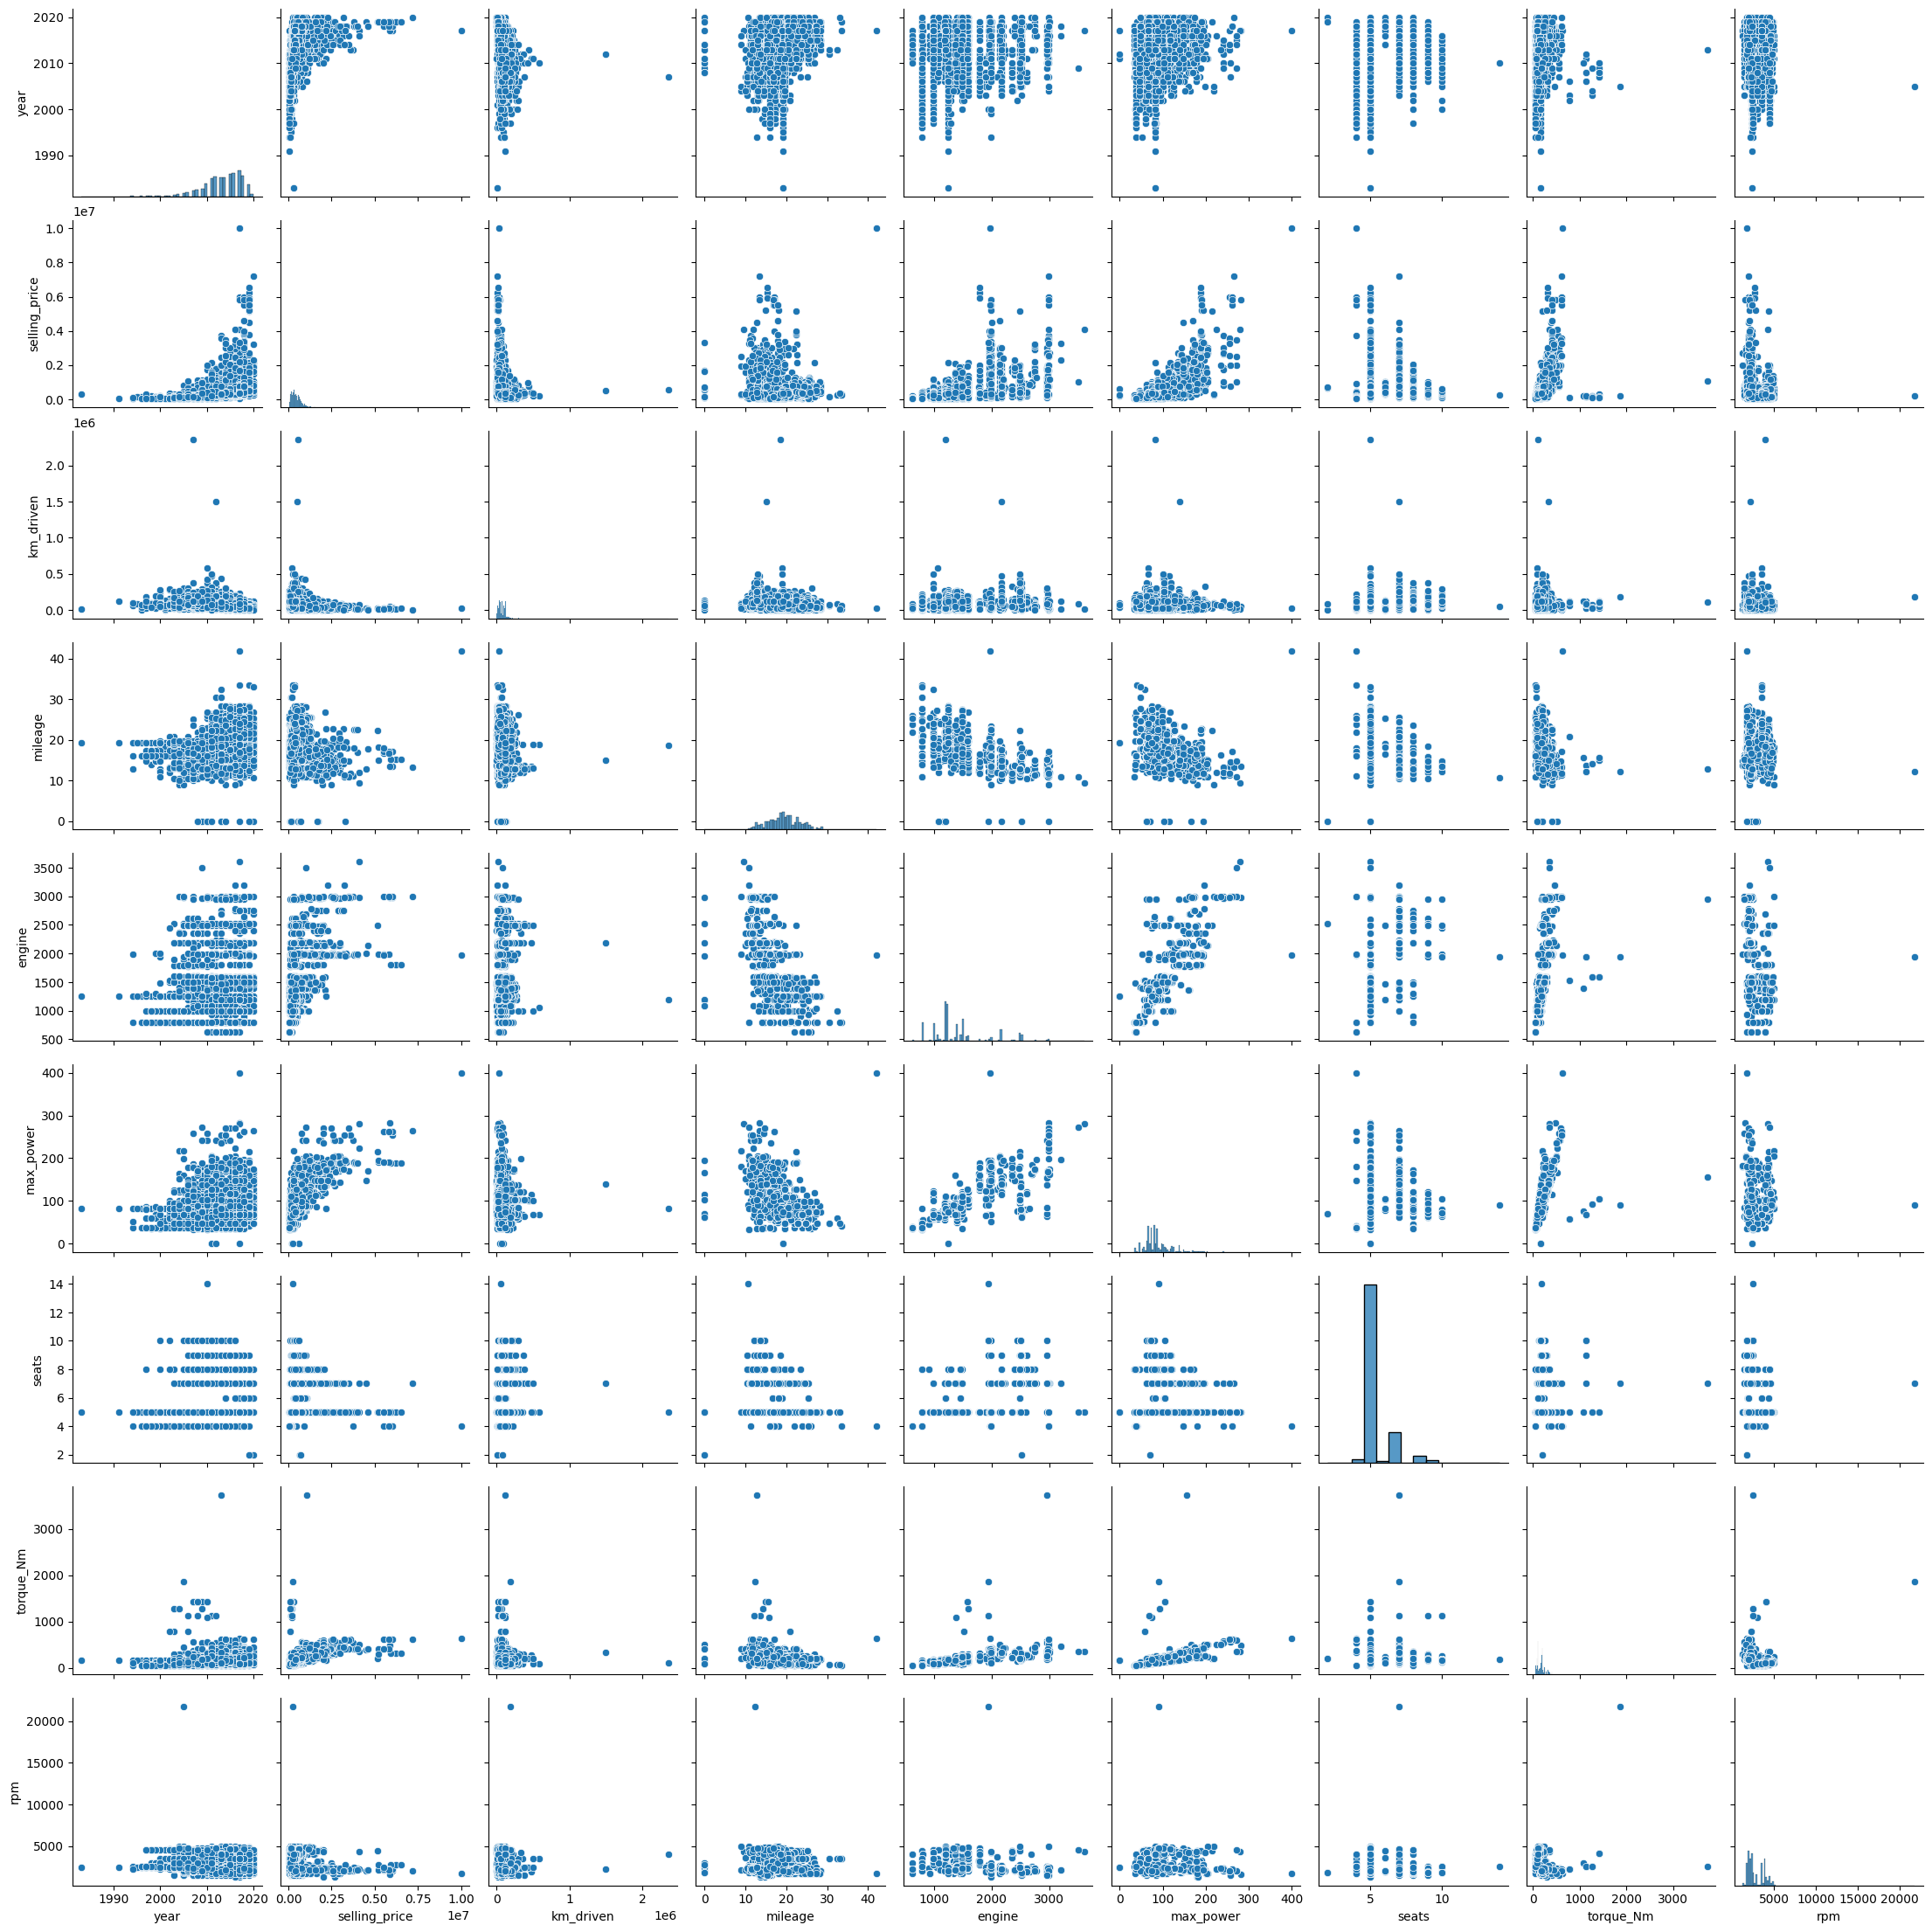

In [227]:
# your code here
sns.pairplot(df_train)

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

> Да, можно, если говорить конкретнее, то по зависимостям selling_price от year, km_driven, max_power явно наблоюдается зависомость одной переменной от другой


**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков**

> Можно. Опять таки selling_price от year, km_driven, max_powers. Плюс ещё видна корреляция между engine, torque_Nm и max_power. Стоит проверить корреляции двигателных признаков друг с дургом, скорее всего нужно будет удалить какие-то из них

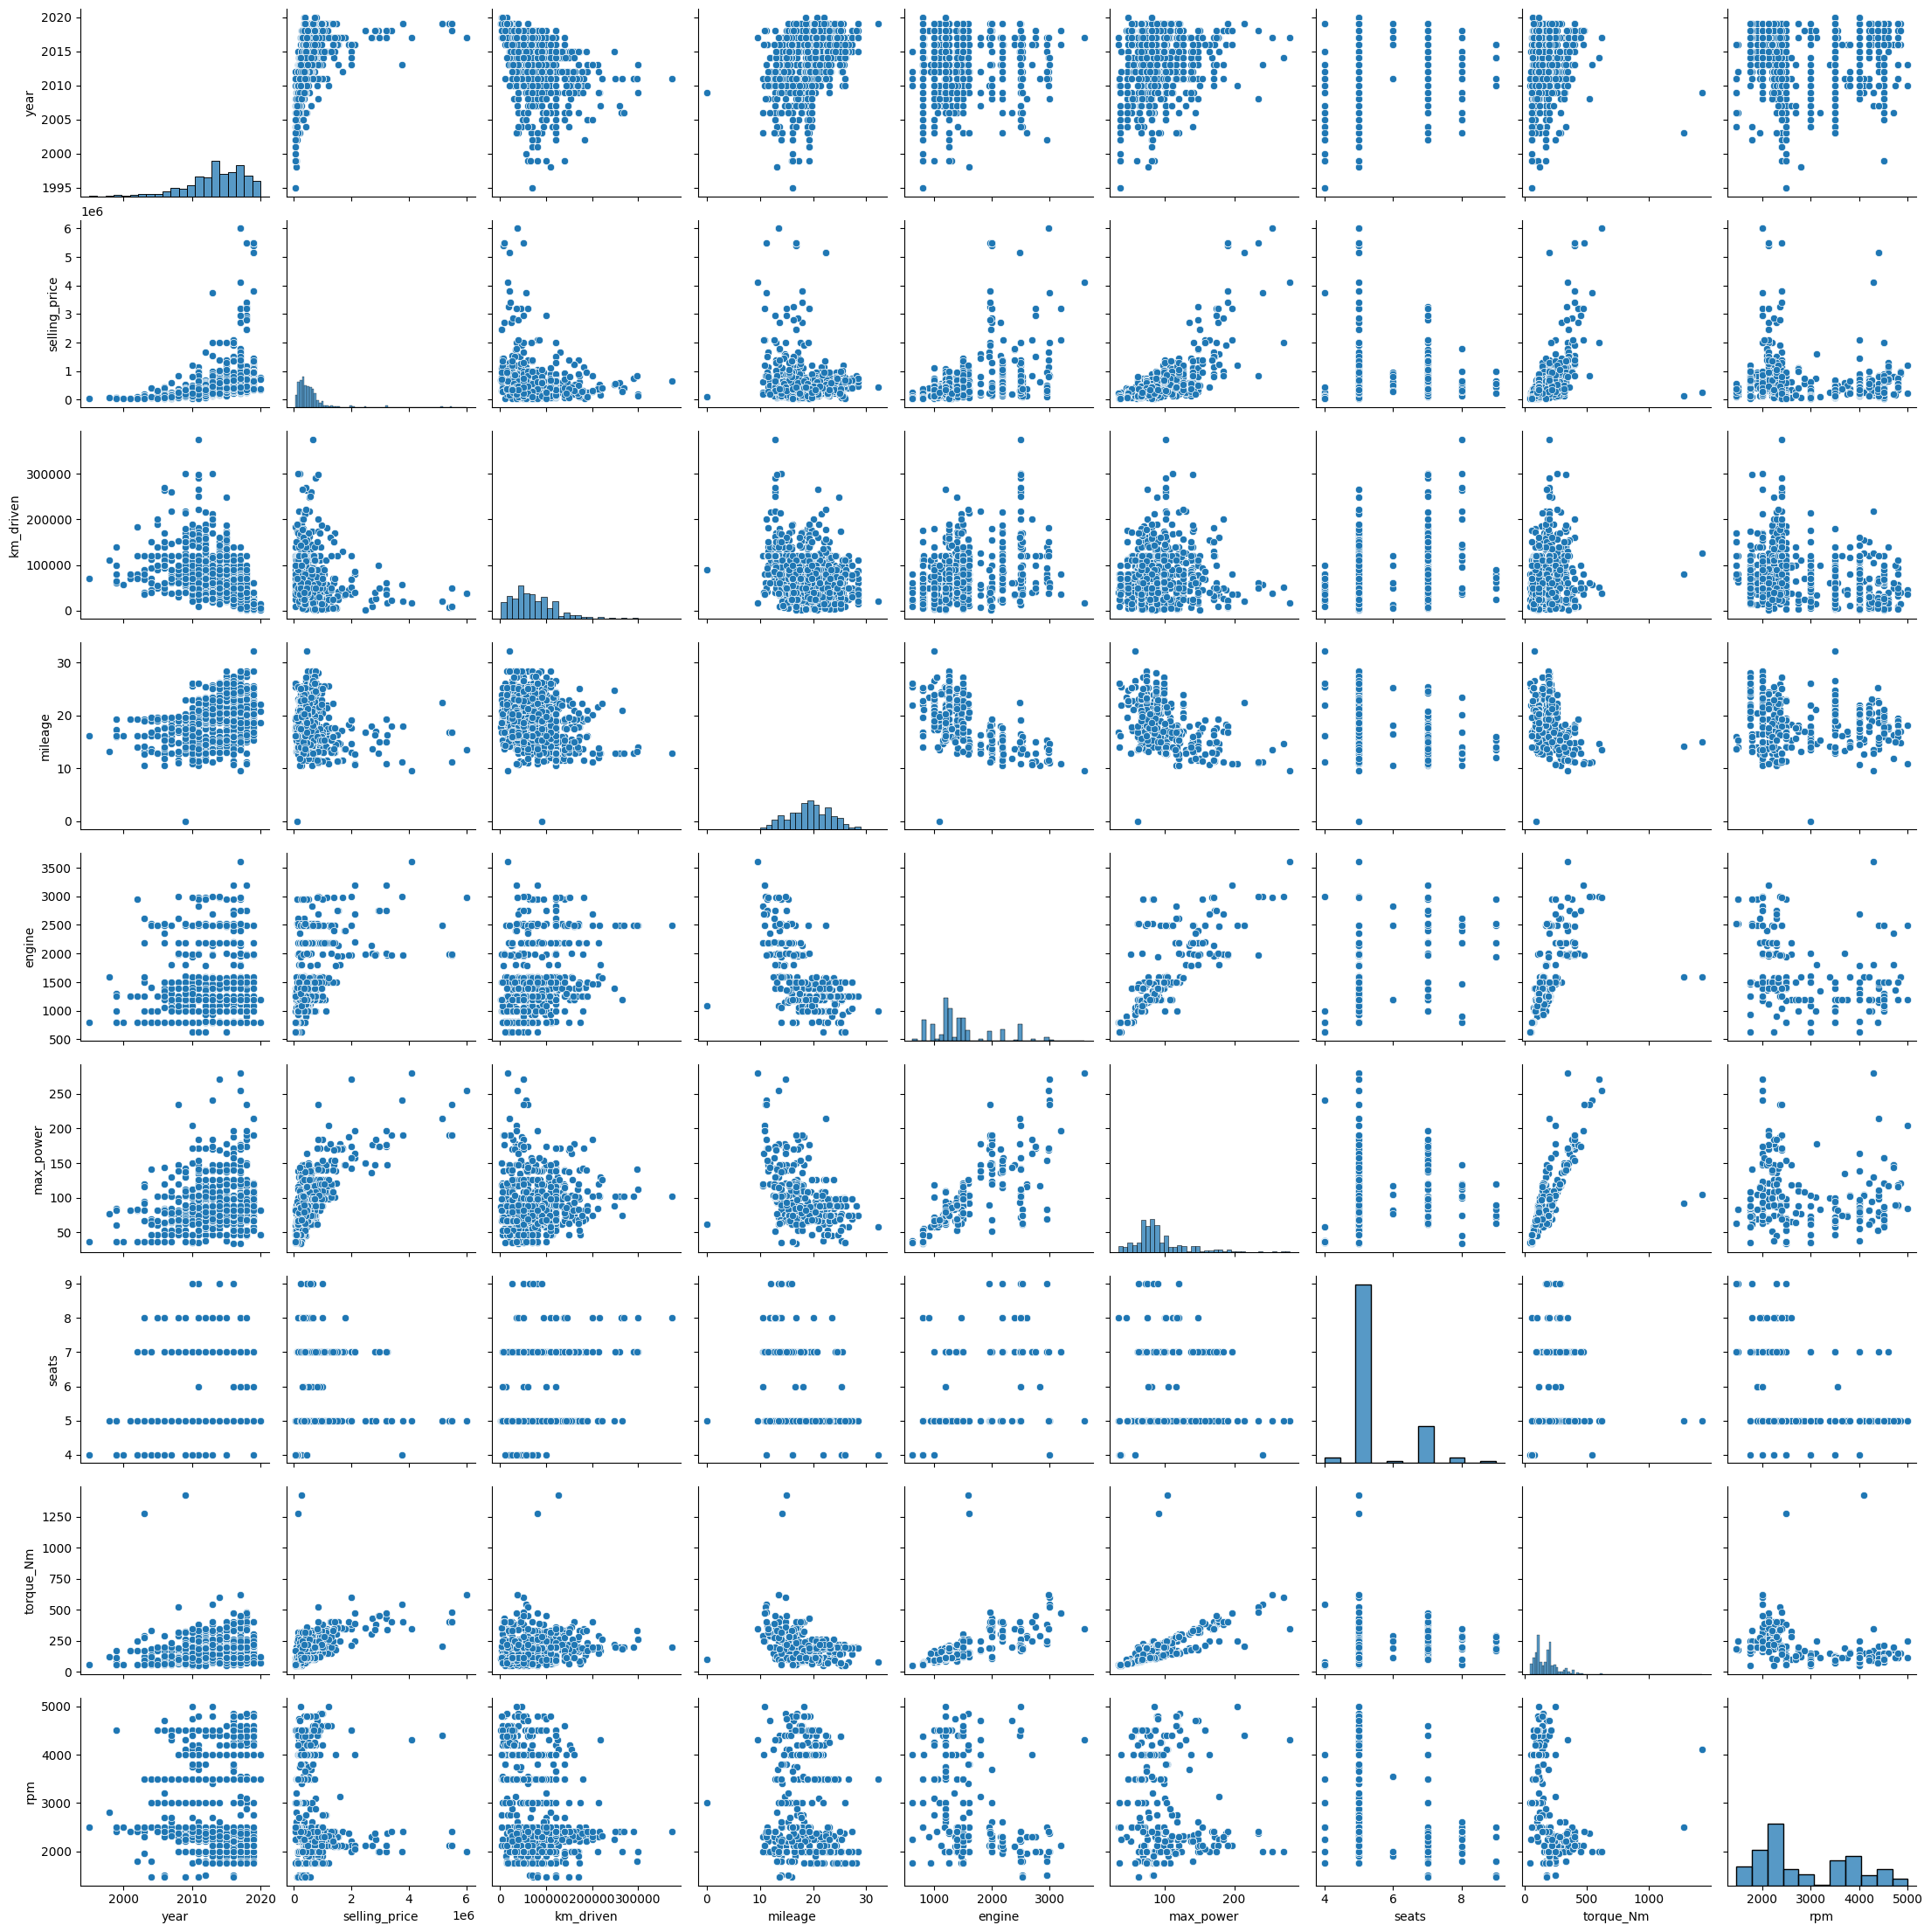

In [228]:
sns.pairplot(df_test)

**Похожими ли оказались совокупности при разделении на трейн и тест?**

> Да, совокупности очень похожи друг на дурга, о чём ещё можно было догадаться ранее на шаге с describe(). К тому же в тесте наблюдается более высокий разброс/разряжённость данных



### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [229]:
df_train_num = df_train.select_dtypes(include='number').corr(method='pearson')

<Axes: >

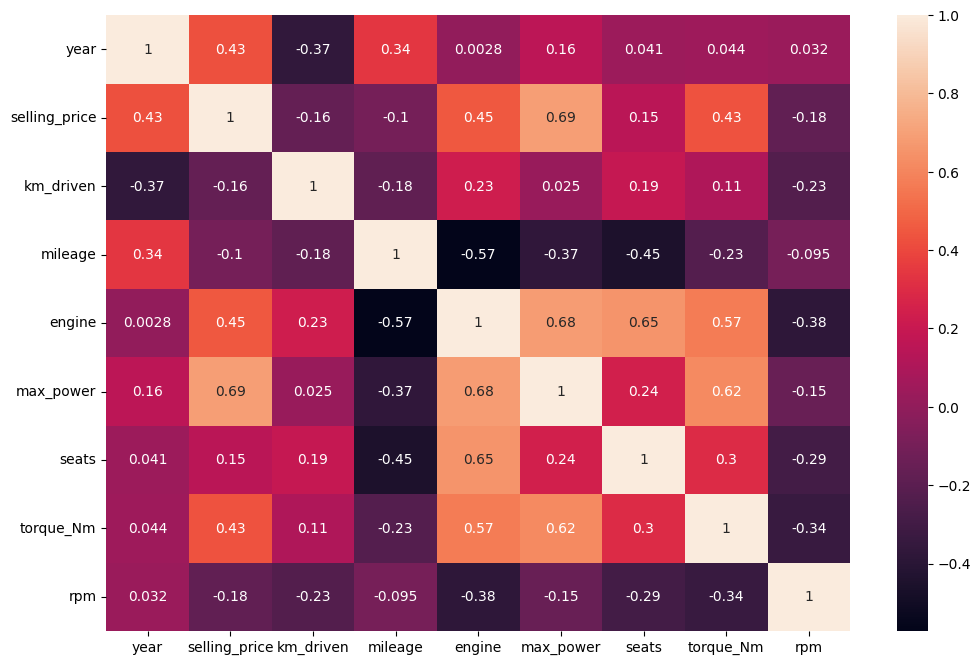

In [230]:
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(df_train_num, annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Какие 2 признака наименее скоррелированы между собой?**

> engine, year (0.025)


**Между какими наблюдается довольно сильная положительная линейная зависимость?**

> max_power, selling_price(0.69)

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

> Судя по величине коэфа корреляции спирмана можно утверждать что между возрастом авто и его пробегом существует умеренная всзаимосвяь (не слабая, но и не сильная)


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

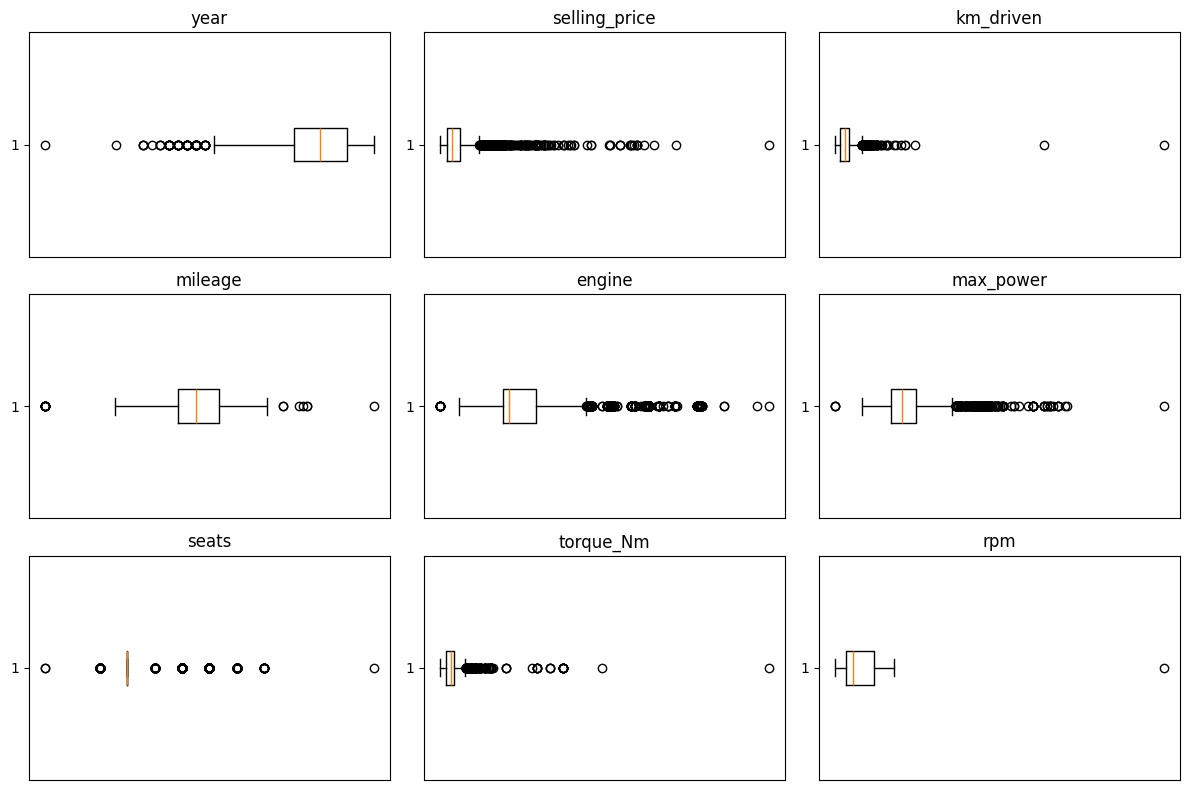

In [231]:
import math

cols = df_train.select_dtypes(include='number').columns

n_cols, n_rows = 3, 3
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df_train[col].dropna(), vert=False)
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

Практически все признаки оч разряжены, перед обучением наверное придётся поиграться с нормализацией, масштабированием и удалением выбросов

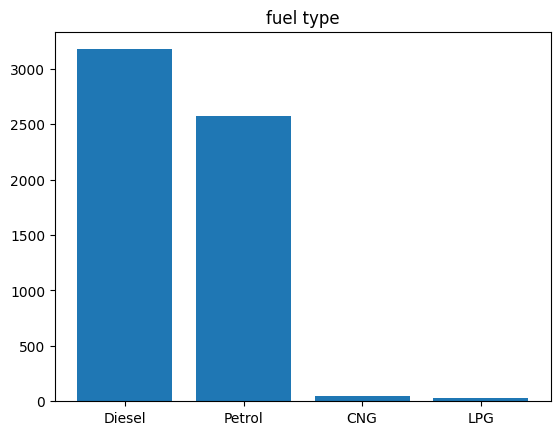

In [232]:
fuel_data = df_train['fuel'].value_counts()
plt.title("fuel type")
plt.bar(fuel_data.index, fuel_data.values)
plt.show()

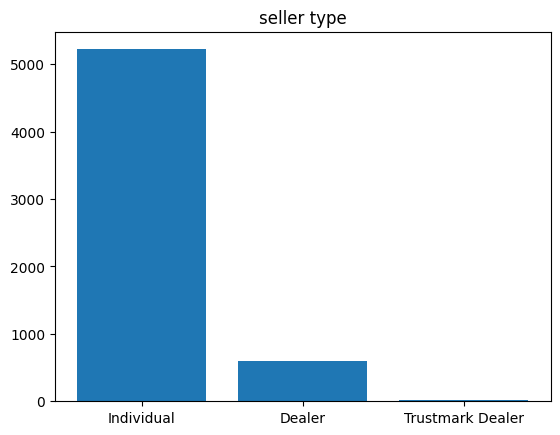

In [233]:
seller_data = df_train['seller_type'].value_counts()
plt.title("seller type")
plt.bar(seller_data.index, seller_data.values)
plt.show()

Ещё одно подтвержение дисбаланса категор признаков. Можно уже навреное сказать что при приенении лин регрессии придётся быть осторожным, надо найти подходящий енкодер (мб таргет енкодер)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [234]:
df_train_num = df_train.select_dtypes(include=['int64', 'float64']).drop('seats', axis=1)
df_test_num = df_test.select_dtypes(include=['int64', 'float64']).drop('seats', axis=1)

In [235]:
y_train = df_train_num['selling_price']
X_train_num = df_train_num.drop('selling_price', axis=1)

In [236]:
y_test = df_test_num['selling_price']
X_test_num = df_test_num.drop('selling_price', axis=1)

In [237]:
# опишите выбранные вещественные признаки
print('df_train')
display(df_train_num.describe(exclude='object'))
print('='*90, '\n')
print('df_test')
display(df_test_num.describe(exclude='object'))

df_train


year  selling_price  km_driven  mileage  engine  max_power  \
count 5840.00        5840.00    5840.00  5840.00 5840.00    5840.00   
mean  2013.43      522960.09   73952.24    19.43 1429.45      87.91   
std      4.10      535432.00   60071.14     3.99  485.66      31.64   
min   1983.00       29999.00       1.00     0.00  624.00       0.00   
25%   2011.00      250000.00   39000.00    16.95 1197.00      68.00   
50%   2014.00      405000.00   70000.00    19.30 1248.00      81.86   
75%   2017.00      640000.00  100000.00    22.30 1498.00      99.00   
max   2020.00    10000000.00 2360457.00    42.00 3604.00     400.00   

       torque_Nm      rpm  
count    5840.00  5840.00  
mean      176.26  2847.03  
std       116.75   972.67  
min        47.09  1300.00  
25%       111.80  2000.00  
50%       170.00  2400.00  
75%       200.12  3750.00  
max      3727.80 21800.00


df_test


year  selling_price  km_driven  mileage  engine  max_power  \
count 1000.00        1000.00    1000.00  1000.00 1000.00    1000.00   
mean  2013.68      617901.04   71393.34    19.34 1454.88      90.84   
std      4.01      758553.86   48486.22     3.95  522.00      34.89   
min   1995.00       31000.00    1303.00     0.00  624.00      34.20   
25%   2011.00      250000.00   37000.00    16.55 1197.00      69.00   
50%   2014.00      434999.00   61500.00    19.30 1248.00      82.42   
75%   2017.00      670000.00  100000.00    22.30 1582.00     102.00   
max   2020.00     6000000.00  375000.00    32.26 3604.00     280.00   

       torque_Nm     rpm  
count    1000.00 1000.00  
mean      177.81 2890.84  
std       103.72  954.93  
min        48.00 1470.00  
25%       111.70 2125.00  
50%       170.00 2400.00  
75%       205.00 4000.00  
max      1422.45 5000.00

In [238]:
print(f'Отношение df_test ко всему датасету: {(len(df_test)/(len(df_test)+len(df_train)))*100:.2f}%')

Отношение df_test ко всему датасету: 14.62%


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train_num, y_train)

pred = model.predict(X_test_num)
pred_train = model.predict(X_train_num)

r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, pred_train)

MSE_test = MSE(y_test, pred)
MSE_train = MSE(y_train, pred_train)
# your code here

In [240]:
print(f'r2: {r2_test:.3f}')
print(f'r2_train: {r2_train:.3f}')
print(f'r2 gap: {(r2_train - r2_test):.3f}')
print(f'r2 gap%: {((r2_train - r2_test)/abs(r2_train))*100:.3f}%')
print('='*60)
print(f'MSE_test: {MSE_test:.3f}')
print(f'MSE_train: {MSE_train:.3f}')
print(f'MSE gap: {(MSE_train - MSE_test):.3f}')
print(f'MSE gap%: {((MSE_train - MSE_test)/abs(MSE_train))*100:.3f}%')
print('='*60)
print(f'RMSE_test: {(MSE_test)**0.5:.3f}')
print(f'RMSE_train: {(MSE_train)**0.5:.3f}')
print(f'RMSE gap: {(MSE_train**0.5 - MSE_test**0.5):.3f}')
print(f'RMSE gap%: {((MSE_train**0.5 - MSE_test**0.5)/abs(MSE_train**0.5))*100:.3f}%')

r2: 0.595
r2_train: 0.600
r2 gap: 0.005
r2 gap%: 0.825%
MSE_test: 232854510692.400
MSE_train: 114694599361.043
MSE gap: -118159911331.357
MSE gap%: -103.021%
RMSE_test: 482550.008
RMSE_train: 338665.911
RMSE gap: -143884.097
RMSE gap%: -42.486%


In [241]:
y_train.mean()

np.float64(522960.0910958904)

In [242]:
((MSE_test**0.5)/y_train.mean())*100

np.float64(92.27281712404579)

**Выводы:**

- Коэф. детерминации больше 0, а значит модель явно неплохо решает задачу
- r2 на тесте незначеительно меньше чем на трейне. Переобучение отсутствует. По итогу модель объясняет примерно 60% дисперсии таргета
- по MSE что-то судить довольно трудно. Но если взять квадратный корень (RMSE), то получается что модель ОЧЕНЬ сильно ошибается, почти на 92%
- модель объясняет структуру, но не даёт приемлемой точности

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [243]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)
pred_train = model.predict(X_train_scaled)

r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, pred_train)

MSE_test = MSE(y_test, pred)
MSE_train = MSE(y_train, pred_train)

In [244]:
print(f'r2: {r2_test:.3f}')
print(f'r2_train: {r2_train:.3f}')
print(f'r2 gap: {(r2_train - r2_test):.3f}')
print(f'r2 gap%: {((r2_train - r2_test)/abs(r2_train))*100:.3f}%')
print('='*60)
print(f'MSE_test: {MSE_test:.3f}')
print(f'MSE_train: {MSE_train:.3f}')
print(f'MSE gap: {(MSE_train - MSE_test):.3f}')
print(f'MSE gap%: {((MSE_train - MSE_test)/abs(MSE_train))*100:.3f}%')
print('='*60)
print(f'RMSE_test: {(MSE_test)**0.5:.3f}')
print(f'RMSE_train: {(MSE_train)**0.5:.3f}')
print(f'RMSE gap: {(MSE_train**0.5 - MSE_test**0.5):.3f}')
print(f'RMSE gap%: {((MSE_train**0.5 - MSE_test**0.5)/abs(MSE_train**0.5))*100:.3f}%')

r2: 0.595
r2_train: 0.600
r2 gap: 0.005
r2 gap%: 0.825%
MSE_test: 232854510692.401
MSE_train: 114694599361.043
MSE gap: -118159911331.358
MSE gap%: -103.021%
RMSE_test: 482550.008
RMSE_train: 338665.911
RMSE gap: -143884.097
RMSE gap%: -42.486%


Измененений практически никаких

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [245]:
table = pd.DataFrame(
    np.column_stack(
        (np.array(X_train_num.columns), abs(model.coef_))
      )
  ).sort_values(by=1, ascending=0).reset_index(drop=True)

table.columns = ['Категоория', 'Вес']
display(table)
print()
display(f'Наиболее информативный признак: {table.iloc[0][0]} --> {table.iloc[0][1]:.3f}')


Категоория       Вес
0  max_power 339836.08
1       year 159011.13
2        rpm  60883.96
3  km_driven  51137.34
4     engine   6042.64
5  torque_Nm   2815.57
6    mileage   1437.53

/tmp/ipython-input-996873871.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Наиболее информативный признак: {table.iloc[0][0]} --> {table.iloc[0][1]:.3f}')


'Наиболее информативный признак: max_power --> 339836.084'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [X] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [246]:
from sklearn.linear_model import Lasso

# your code here
lasso_model = Lasso()

lasso_model.fit(X_train_scaled, y_train)

pred = lasso_model.predict(X_test_scaled)
pred_train = lasso_model.predict(X_train_scaled)

r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, pred_train)

MSE_test = MSE(y_test, pred)
MSE_train = MSE(y_train, pred_train)

In [247]:
print(f'r2: {r2_test:.3f}')
print(f'r2_train: {r2_train:.3f}')
print(f'r2 gap: {(r2_train - r2_test):.3f}')
print(f'r2 gap%: {((r2_train - r2_test)/abs(r2_train))*100:.3f}%')
print('='*60)
print(f'MSE_test: {MSE_test:.3f}')
print(f'MSE_train: {MSE_train:.3f}')
print(f'MSE gap: {(MSE_train - MSE_test):.3f}')
print(f'MSE gap%: {((MSE_train - MSE_test)/abs(MSE_train))*100:.3f}%')
print('='*60)
print(f'RMSE_test: {(MSE_test)**0.5:.3f}')
print(f'RMSE_train: {(MSE_train)**0.5:.3f}')
print(f'RMSE gap: {(MSE_train**0.5 - MSE_test**0.5):.3f}')
print(f'RMSE gap%: {(((MSE_train**0.5 - MSE_test**0.5))/abs(MSE_train**0.5))*100:.3f}%')

r2: 0.595
r2_train: 0.600
r2 gap: 0.005
r2 gap%: 0.825%
MSE_test: 232855059341.480
MSE_train: 114694599386.617
MSE gap: -118160459954.863
MSE gap%: -103.022%
RMSE_test: 482550.577
RMSE_train: 338665.911
RMSE gap: -143884.666
RMSE gap%: -42.486%


In [248]:
table = pd.DataFrame(
    np.column_stack(
        (np.array(X_train_num.columns), abs(lasso_model.coef_))
      )
  ).sort_values(by=1, ascending=0).reset_index(drop=True)

table.columns = ['Категоория', 'Вес']
display(table)
print()
display(f'Наиболее информативный признак: {table.iloc[0][0]} --> {table.iloc[0][1]:.3f}')


Категоория       Вес
0  max_power 339833.32
1       year 159008.56
2        rpm  60879.87
3  km_driven  51137.01
4     engine   6034.18
5  torque_Nm   2814.28
6    mileage   1431.66

/tmp/ipython-input-1132337212.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Наиболее информативный признак: {table.iloc[0][0]} --> {table.iloc[0][1]:.3f}')


'Наиболее информативный признак: max_power --> 339833.320'

Качество модели lasso-регрессии с параметрами по умолчанию почти не отличается от простой лдинейной регресси. Никакие из весов не занулились. Я предполагаю, что дело в неотмасштабированном таргете и в слишком маленьком для него штрафе. Так что стоит попроьбовать либо воспользоваться скалером для таргета на трейне и тесте, либо увеличить альфу

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [249]:
%%time
from sklearn.model_selection import GridSearchCV
cv = 10
parameters = {'alpha': range(7000, 8000, 10)}

lasso_cv = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=cv)
lasso_cv.fit(X_train_scaled, y_train)

best_model = lasso_cv.best_estimator_

r2 = r2_score(y_test, best_model.predict(X_test_scaled))

print(f"Лучшее значение альфа: {lasso_cv.best_params_['alpha']}")
print(f"Лучший MSE на крос вал: {abs(lasso_cv.best_score_):,.3f}")
print(f"Лучший R2 {r2:.3f}")

print(f'Грид-сёрч обучил {cv * len(parameters['alpha'])} моделей')

Лучшее значение альфа: 7270
Лучший MSE на крос вал: 118,961,137,655.025
Лучший R2 0.588
Грид-сёрч обучил 1000 моделей
CPU times: user 4.62 s, sys: 5.94 ms, total: 4.63 s
Wall time: 4.73 s


In [250]:
lasso_cv_table = pd.DataFrame(
    np.column_stack(
        (np.array(X_train_num.columns), abs(best_model.coef_))
      )
  ).sort_values(by=1, ascending=0).reset_index(drop=True)

table.columns = ['Категоория', 'Вес']
display(lasso_cv_table)

0         1
0  max_power 332630.23
1       year 154854.83
2        rpm  51420.75
3  km_driven  43869.57
4    mileage      0.00
5     engine      0.00
6  torque_Nm      0.00

Занулилось 3 признака: mileage,	engine, torque_Nm

In [251]:
print(f"Интерсепт: {best_model.intercept_}")

Интерсепт: 522960.0910958867


**Ваша задача 2:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [252]:
%%time
from sklearn.linear_model import ElasticNet

# your code here

cv = 10
parameters = {'alpha': np.arange(0.01, 1, 0.01), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elasticnet_cv = GridSearchCV(ElasticNet(), parameters, scoring='neg_mean_squared_error', cv=cv)
elasticnet_cv.fit(X_train_scaled, y_train)

best_model = elasticnet_cv.best_estimator_

r2 = r2_score(y_test, best_model.predict(X_test_scaled))


CPU times: user 23.2 s, sys: 34.6 ms, total: 23.3 s
Wall time: 23.6 s


In [253]:
print(f"Лучшее значение альфа: {elasticnet_cv.best_params_['alpha']}")
print(f"Лучшее значение l1_ratio: {elasticnet_cv.best_params_['l1_ratio']}")
print(f"Лучший MSE на крос вал: {abs(elasticnet_cv.best_score_):,.3f}")
print(f"Лучший R2 {r2:.3f}")
print(f'Грид-сёрч обучил {cv * len(parameters['alpha']) * len(parameters['l1_ratio'])} моделей')

Лучшее значение альфа: 0.06999999999999999
Лучшее значение l1_ratio: 0.9
Лучший MSE на крос вал: 119,567,486,615.344
Лучший R2 0.593
Грид-сёрч обучил 4950 моделей


In [254]:
elasticnet_cv_table = pd.DataFrame(
    np.column_stack(
        (np.array(X_train_num.columns), best_model.coef_)
      )
  ).sort_values(by=1, ascending=0).reset_index(drop=True)

table.columns = ['Категоория', 'Вес']
display(elasticnet_cv_table)

0         1
0  max_power 334358.74
1       year 158059.02
2  torque_Nm   4830.41
3    mileage   -241.82
4     engine  -1951.26
5  km_driven -51498.83
6        rpm -59002.98

In [255]:
print(f"Интерсепт: {best_model.intercept_}")

Интерсепт: 522960.09109588666


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`. СТОЛБЕЦ ПРЕДОБРАБОТАН

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

---


In [256]:
df_train['name'] = df_train['name'].apply(lambda x: x.split()[0])
df_test['name'] = df_test['name'].apply(lambda x: x.split()[0])

/tmp/ipython-input-2382502239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['name'] = df_train['name'].apply(lambda x: x.split()[0])


In [257]:
num_cols = df_train.select_dtypes(include='number').columns.drop('seats')

X_train_enc = df_train.drop(columns=num_cols)
X_test_enc = df_test.drop(columns=num_cols)


In [258]:
X_train_enc

name    fuel seller_type transmission                 owner  seats
0      Maruti  Diesel  Individual       Manual           First Owner      5
1       Skoda  Diesel  Individual       Manual          Second Owner      5
2     Hyundai  Diesel  Individual       Manual           First Owner      5
3      Maruti  Petrol  Individual       Manual           First Owner      5
4     Hyundai  Petrol  Individual       Manual           First Owner      5
...       ...     ...         ...          ...                   ...    ...
5835  Hyundai  Petrol  Individual       Manual           First Owner      5
5836   Maruti  Petrol  Individual       Manual          Second Owner      5
5837  Hyundai  Petrol  Individual       Manual           First Owner      5
5838  Hyundai  Diesel  Individual       Manual  Fourth & Above Owner      5
5839   Maruti  Diesel  Individual       Manual           First Owner      5

[5840 rows x 6 columns]

### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [259]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

enc = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train_enc)
X_test_enc = enc.transform(X_test_enc)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Первым делом соберу нормированные и закодированные признаки

In [269]:
X_train_scaled.shape, X_train_enc.shape

((5840, 7), (5840, 47))

In [260]:
from scipy.sparse import hstack

X_train_final = hstack([X_train_scaled, X_train_enc])
X_test_final = hstack([X_test_scaled, X_test_enc])


In [261]:
(X_train_final.shape, X_test_final.shape)

((5840, 54), (1000, 54))

In [262]:
%%time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

cv = 10
parameters = {'alpha': np.logspace(-2, 2, 20)}

ridge_cv = GridSearchCV(Ridge(), parameters, scoring='r2', cv=cv)
ridge_cv.fit(X_train_final, y_train)

best_model_l2 = ridge_cv.best_estimator_
y_test_pred = best_model_l2.predict(X_test_final)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)


print(f"Лучшее значение альфа: {ridge_cv.best_params_['alpha']}")
print(f"Лучший R2 на крос вал: {ridge_cv.best_score_:,.3f}")
print(f"R2 на тесте: {r2_test:.3f}")
print(f"MSE на тесте: {mse_test:,.3f}")
print(f"RMSE на тесте: {rmse_test:,.3f}")
print(f'Грид-сёрч обучил {cv * len(parameters['alpha'])} моделей')

Лучшее значение альфа: 2.06913808111479
Лучший R2 на крос вал: 0.712
R2 на тесте: 0.775
MSE на тесте: 129,339,856,327.166
RMSE на тесте: 359,638.508
Грид-сёрч обучил 200 моделей
CPU times: user 4.64 s, sys: 2.08 ms, total: 4.65 s
Wall time: 4.71 s


In [263]:
%%time
from sklearn.model_selection import GridSearchCV
cv = 10
parameters = {'alpha': np.logspace(-2, 2, 20)}

lasso_cv = GridSearchCV(Lasso(), parameters, scoring='r2', cv=cv)
lasso_cv.fit(X_train_final, y_train)

best_model_l1 = lasso_cv.best_estimator_
y_test_pred = best_model_l1.predict(X_test_final)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)


print(f"Лучшее значение альфа: {lasso_cv.best_params_['alpha']}")
print(f"Лучший r2 на крос вал: {lasso_cv.best_score_:,.3f}")
print(f"R2 на тесте: {r2_test:.3f}")
print(f"MSE на тесте: {mse_test:,.3f}")
print(f"RMSE на тесте: {rmse_test:,.3f}")
print(f'Грид-сёрч обучил {cv * len(parameters['alpha'])} моделей')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141795768940369.47, tolerance: 124693338888.6631
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177722155302751.84, tolerance: 156431196096.99866
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169690716533123.38, tolerance: 152053531323.47067
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: Con

Лучшее значение альфа: 0.01
Лучший r2 на крос вал: 0.708
R2 на тесте: 0.786
MSE на тесте: 122,726,202,150.173
RMSE на тесте: 350,322.997
Грид-сёрч обучил 200 моделей
CPU times: user 2min 59s, sys: 134 ms, total: 2min 59s
Wall time: 3min 2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188261106894881.38, tolerance: 167396789601.0057
  model = cd_fast.sparse_enet_coordinate_descent(


In [264]:
%%time
from sklearn.linear_model import ElasticNet

cv = 10
parameters = {'alpha': np.logspace(-2, 2, 20), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elasticnet_cv = GridSearchCV(ElasticNet(), parameters, scoring='r2', cv=cv)
elasticnet_cv.fit(X_train_final, y_train)

best_model_combo = elasticnet_cv.best_estimator_
y_test_pred = best_model_combo.predict(X_test_final)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Лучшее значение альфа: {elasticnet_cv.best_params_['alpha']}")
print(f"Лучшее значение l1_ratio: {elasticnet_cv.best_params_['l1_ratio']}")
print(f"Лучший r2 на крос вал: {elasticnet_cv.best_score_:,.3f}")
print(f"R2 на тесте: {r2_test:.3f}")
print(f"MSE на тесте: {mse_test:,.3f}")а
print(f"RMSE на тесте: {rmse_test:,.3f}")
print(f'Грид-сёрч обучил {cv * len(parameters['alpha']) * len(parameters['l1_ratio'])} моделей')

Лучшее значение альфа: 0.01
Лучшее значение l1_ratio: 0.9
Лучший r2 на крос вал: 0.710
R2 на тесте: 0.759
MSE на тесте: 138,279,690,554.661
RMSE на тесте: 371,859.773
Грид-сёрч обучил 1000 моделей
CPU times: user 47.9 s, sys: 13.5 ms, total: 47.9 s
Wall time: 48.6 s


**Удалось ли улучшить качество прогнозов?**





При сравнении Ridge, Lasso, Elasticnet на одном и том же датасете качество обучения по-прежнему лучшее при применении Ridge регрессии, что о говорит о том что для решения данной задачи больше всего подхоидит L2-регуляризация

In [ ]:
ridge_cv_table = pd.DataFrame(
    np.column_stack(
        (np.array(X_train_num.columns), best_model.coef_)
      )
  ).sort_values(by=1, ascending=0).reset_index(drop=True)

table.columns = ['Категоория', 'Вес']
display(elasticnet_cv_table)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [265]:
def business_metric(y_true, y_pred):
    good = abs(np.asarray(y_true) - np.asarray(y_pred)) <= 0.1 * np.asarray(y_true)
    return good.mean()

# business_metric(# your code here)

In [266]:
print(f'Значение бизнес метрики (Lasso): {business_metric(y_test, best_model_l1.predict(X_test_final)):.4f}')
print(f'Значение бизнес метрики (Ridge): {business_metric(y_test, best_model_l2.predict(X_test_final)):.4f}')
print(f'Значение бизнес метрики (ElasticNet): {business_metric(y_test, best_model_combo.predict(X_test_final)):.4f}')


Значение бизнес метрики (Lasso): 0.3150
Значение бизнес метрики (Ridge): 0.2910
Значение бизнес метрики (ElasticNet): 0.2790


Как мне кажется, заданный порог слишком жёсткий, но в конечном итоге задачу бизнеса лучше всего решает модель с L1-регуляризацией

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [267]:
import pickle
import os


model = best_model_l2

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'linear_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Модель сохранена: {model_path}")

Модель сохранена: models/linear_model.pkl


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.